# Web cut

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [ ]:
# Load the data using pandas
data = pd.read_csv('../data/cut_web.csv')
data = data.head(-100) # remove last experiment
data.head(10)

In [3]:
from cut_predictor import CutPredictor

reg = CutPredictor(
    data = data,
    process_parameters = [
        'Material_ID', 
        'Niederhalterkraft', 
        'Stempel_ID', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    categorical = [
        'Material_ID', 
        'Stempel_ID', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    position = 'c_phi',
    output = 'c_rho',
    angle=True,
)
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Material_ID : categorical [1, 2, 3, 4, 5, 6]
	- Niederhalterkraft : numerical [ 10.0  ...  500.0 ]
	- Stempel_ID : categorical [2, 3]
	- Einlegeposition : categorical [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
	- Ziehtiefe : categorical [30, 50, 70]
Angle variable:
	- c_phi : numerical, [ 1.2217304763960306 / 1.5707963267948966 ]
Output variable:
	- c_rho : numerical, [ 462.8938277335998 / 465.1706438896841 ]

Inputs
------------------------------------------------------------

(88000, 25)

Outputs
------------------------------------------------------------

(88000,)


In [ ]:
best_config = reg.autotune(
    save_path='best_web_model',
    trials=100,
    max_epochs=100, 
    layers=[2, 4],
    neurons=[64, 256, 64],
    dropout=[0.0, 0.5, 0.1],
    learning_rate=[1e-5, 1e-3]
)
print(best_config)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                         

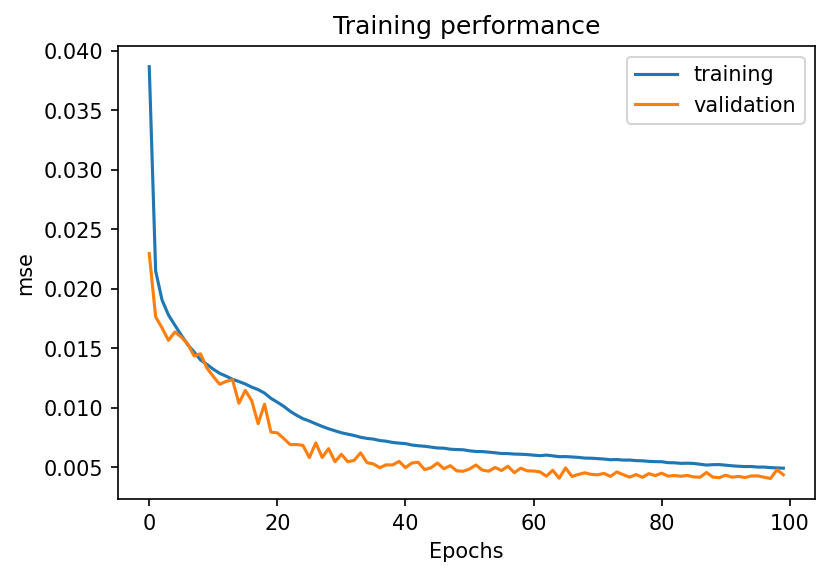

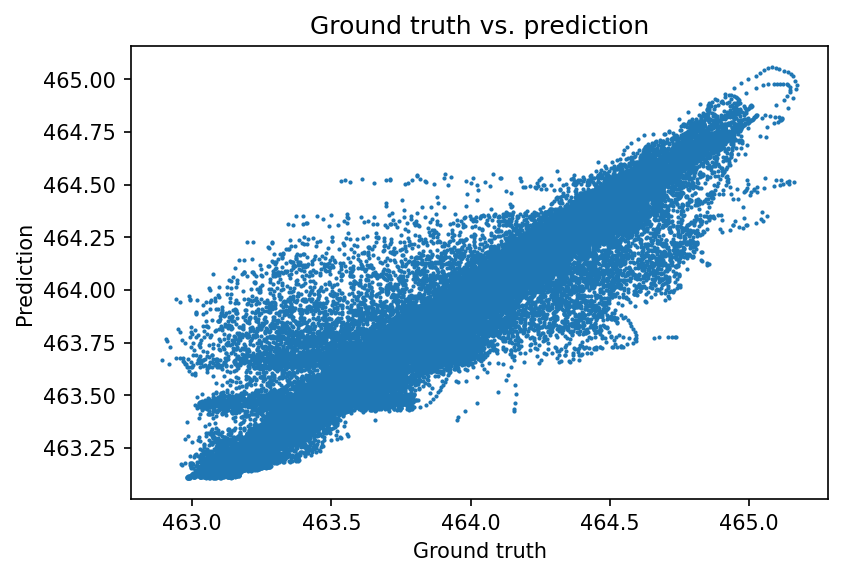

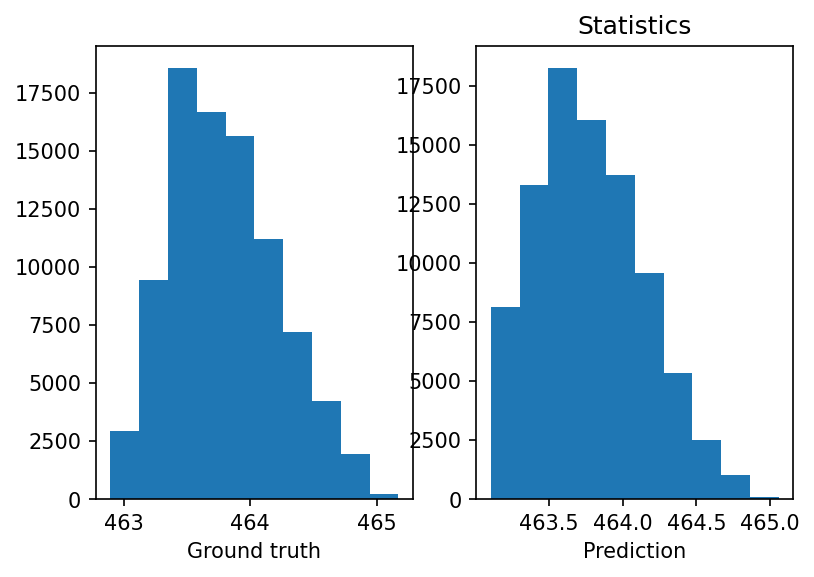

In [4]:
config = {
    'batch_size': 4096,
    'max_epochs': 100,
    'layers': [128, 128, 128, 128, 128],
    'dropout': 0.1,
    'learning_rate': 0.001
}

# or best_config from autotune if you already did it once

reg.custom_model(save_path='best_web_model', config=config, verbose=True)
reg.training_summary()

In [ ]:
reg.load(load_path='best_web_model')

Doe_ID 641


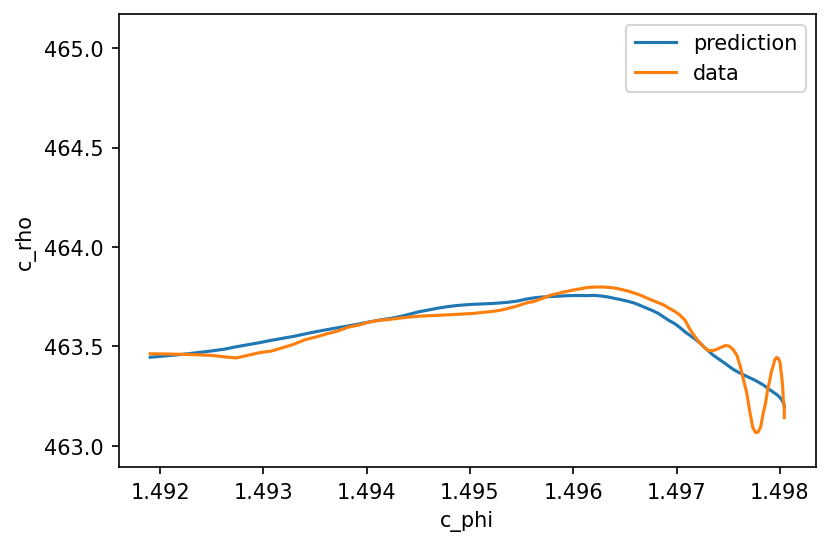

In [5]:
idx = np.random.choice(878)
print("Doe_ID", idx+1)
reg.compare(idx*100, (idx+1)*100)

In [6]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
reg.interactive()

interactive(children=(Dropdown(description='Material_ID', options=(1, 2, 3, 4, 5, 6), value=1), FloatSlider(va…